<h1 align="center"> Python for the Humanities and Social Sciences <br> *Data Manipulation* </h1>

## Info
- Scott Bailey (CIDR), *scottbailey@stanford.edu*
- Javier de la Rosa (CIDR), *versae@stanford.edu*
- Ashley Jester (CIDR/SSDS), *ajester@stanford.edu*
- Green Library 121A, 2pm-4pm

## Topics
- Pandas Series and DataFrame (numpy, scipy)
- Loading data in, null and missing data
- Describing data
- Column manipulation
- String manipulation (super basic regex)
- Split-Apply-Combine
- Plotting (matplotlib, seaborn):
  - Basic charts (line, bar, pie)
  - Histograms
  - Scatter plots
  - Boxplots, violinplots

### Virtual environments (venvs) and Anaconda
- Isolated environment so each project can have its own dependencies without conflicts with other projects
- Anaconda has its own environment manager and package manager, let's you easily set Python versions, and comes with many of the standard packages used in scientific computing

To set up the environment for this project, in your BASH shell, run (`$` means a shell command):

```
$ conda create -n data python=3.5 anaconda
```

Or installing the specific packages we'll be using:

```
$ conda create -n data python=3.5
$ conda install -n data jupyter pandas numpy scipy matplotlib seaborn requests
```

This creates an environment named `data`, where the python version is specified to 3.5, and installs the necessary packages for data exploration and manipulation in the environment.

After you create the environment, run `source activate data` or `activate data` depending on whether you are on OSX or Windows to activate the environment.

### Jupyter Notebooks
- Used to be IPython Notebooks
- Write and evaluate code at a granular level without rerunning scripts constantly and using a lot of print debugging
- Mix in Markdown and HTML within your notebook, and so is a great way of presenting code and data analysis

Once you have a virtual environment running, just run `jupyter notebook` from the location where you want to store your notebook.

```
$ jupyter notebook
```

And go to http://localhost:8888/ in your browser.

## Pandas

From Jake Vanderplas' book [**Python Data Science Handbook**](http://shop.oreilly.com/product/0636920034919.do) (from which some code excerpts are used in this workshop):

> Pandas is a newer package built on top of NumPy, and provides an efficient implementation of a `DataFrame`. `DataFrame`s are essentially multidimensional arrays with attached row and column labels, and often with heterogeneous types and/or missing data. As well as offering a convenient storage interface for labeled data, Pandas implements a number of powerful data operations familiar to users of both database frameworks and spreadsheet programs.

In [1]:
import numpy as np
import pandas as pd
import requests

# Set some options
pd.set_option('display.max_columns', 20)
pd.set_option('display.max_rows', 10)

There are three main data structures in Pandas: `Series`, `DataFrame`, and `Index`. Pandas has a very decent [documentation](http://pandas.pydata.org/pandas-docs/stable/), and using Jupyter, any method help can be shown by appending the a `?` to the end and running the cell.

In [2]:
# For example
pd.isnull?

### `Series`
A `Series` is a one-dimensional array of indexed data. It can be seens as a specialized dictionary or a generalized NumPy array.

In [3]:
pd.Series([1, 2, 3, 4])

0    1
1    2
2    3
3    4
dtype: int64

In [4]:
pd.Series([1, 2, 3, 4], index=["a", "b", "c", "d"])

a    1
b    2
c    3
d    4
dtype: int64

In [5]:
pd.Series({"a": 1, "b": 2, "c": 3, "d": 4})

a    1
b    2
c    3
d    4
dtype: int64

In [6]:
pd.Series([1, 2, 3, 4], index=["a", "b", "c", "d"]) == pd.Series({"a": 1, "b": 2, "c": 3, "d": 4})

a    True
b    True
c    True
d    True
dtype: bool

In [7]:
# Accessing elements
s = pd.Series([1, 2, 3, 4], index=["a", "b", "c", "d"])
s["a"]

1

In [8]:
s["b":"d"]

b    2
c    3
d    4
dtype: int64

In [9]:
# NumPy array underneath
s.values

array([1, 2, 3, 4])

In [10]:
s.sum()

10

In [11]:
s.prod()

24

In [12]:
# With an index
s.index

Index(['a', 'b', 'c', 'd'], dtype='object')

### `DataFrame`

A `DataFrame` is a two-dimensional array with both flexible row indices and flexible column names. It can be seen as 
as a generalization of a two-dimensional NumPy array, or a specialization of a dictionary in which each column name maps to a `Series` of column data.

In [13]:
population_dict = {'California': 38332521, 'Texas': 26448193, 'New York': 19651127,
                   'Florida': 19552860, 'Illinois': 12882135}
area_dict = {'California': 423967, 'Texas': 695662, 'New York': 141297,
             'Florida': 170312, 'Illinois': 149995}
states = pd.DataFrame({'population': population_dict, 'area': area_dict})
states

,area,population
California,423967,38332521
Florida,170312,19552860
Illinois,149995,12882135
New York,141297,19651127
Texas,695662,26448193


In [14]:
population = pd.Series(population_dict)
area = pd.Series(area_dict)
pd.DataFrame({'population': population, 'area': area})

,area,population
California,423967,38332521
Florida,170312,19552860
Illinois,149995,12882135
New York,141297,19651127
Texas,695662,26448193


In [15]:
# Index
states.index

Index(['California', 'Florida', 'Illinois', 'New York', 'Texas'], dtype='object')

In [16]:
# Values
states.values

array([[  423967, 38332521],
       [  170312, 19552860],
       [  149995, 12882135],
       [  141297, 19651127],
       [  695662, 26448193]])

In [17]:
# Columns
states.columns

Index(['area', 'population'], dtype='object')

`DataFrames` can be created in different ways

In [18]:
# From regular dictionaries
data = {'column A': [1,2,3,4], 'column B': list('abcd')}
pd.DataFrame(data)

,column A,column B
0,1,a
1,2,b
2,3,c
3,4,d


In [19]:
pd.DataFrame.from_dict(data)

,column A,column B
0,1,a
1,2,b
2,3,c
3,4,d


In [20]:
# From lists
data = [(1,'a'),(2,'b'),(3,'c'),(4,'d')]
labels = ['ColumnA','ColumnB']
pd.DataFrame.from_records(data, columns=labels)

,ColumnA,ColumnB
0,1,a
1,2,b
2,3,c
3,4,d


### Index

In [21]:
states.index

Index(['California', 'Florida', 'Illinois', 'New York', 'Texas'], dtype='object')

In [22]:
# Acts like a Python set() that supports duplicated items
"California" in states.index

True

## Data I/O

Pandas provides a few methods to load in and out data in CSVs, Excel spreadsheets, HDF, or even JSON format.

For example, click in the next URL of a CSV file containing twitter data during the release of the Apple Watch: http://bit.ly/python_workshop_data

In [23]:
# Pandas can even fetch data from a URL
pd.read_csv("http://bit.ly/python_workshop_data")

,contributors,created_at,favorite_count,favorited,filter_level,id,id_str,in_reply_to_screen_name,in_reply_to_status_id,in_reply_to_status_id_str,...,hashtags,media,symbols,trends,urls,user_mentions,lat,lon,country,conuntry_code
0,NaN,2015-03-09 21:01:01.000,0.0,0.0,low,575038603887251456,5.750386e+17,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,http://ift.tt/1AXDXIR,NaN,NaN,NaN,NaN,NaN
1,NaN,2015-03-09 21:08:06.000,0.0,0.0,low,575040384482590720,5.750404e+17,NaN,NaN,NaN,...,NaN,http://twitter.com/MisterC00l/status/575013358...,NaN,NaN,NaN,MisterC00l,NaN,NaN,NaN,NaN
2,NaN,2015-03-09 21:21:47.000,0.0,0.0,low,575043831525146624,5.750438e+17,NaN,NaN,NaN,...,android,http://twitter.com/androidcentral/status/57502...,NaN,NaN,http://phon.es/yljt,androidcentral,NaN,NaN,NaN,NaN
3,NaN,2015-03-09 21:27:31.000,0.0,0.0,low,575045273384263680,5.750453e+17,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,http://huff.to/1KMYiMd,LeHuffPost,NaN,NaN,NaN,NaN
4,NaN,2015-03-09 21:01:23.000,0.0,0.0,low,575038696988131328,5.750387e+17,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,http://japan.cnet.com/sp/apple_watch/35061515/...,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9980,NaN,2015-03-09 21:21:24.000,0.0,0.0,low,575043732472528896,5.750437e+17,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,http://www.apple.com/ru/watch/battery.html,wylsacom,NaN,NaN,NaN,NaN
9981,NaN,2015-03-09 21:32:28.000,0.0,0.0,low,575046518094200832,5.750465e+17,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9982,NaN,2015-03-09 21:27:59.000,0.0,0.0,low,575045390338256896,5.750454e+17,NaN,NaN,NaN,...,NaN,http://twitter.com/SAI/status/5750453903382568...,NaN,NaN,http://read.bi/1AXKvrd,NaN,NaN,NaN,NaN,NaN
9983,NaN,2015-03-09 21:27:31.000,0.0,0.0,low,575045274558578688,5.750453e+17,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,"http://apple.com/watch,https://amp.twimg.com/v...",AppStore,NaN,NaN,NaN,NaN


Let's save the previous data to a locala file.

In [24]:
with open("twitter.csv", "wb") as file:
    file.write(requests.get("http://bit.ly/python_workshop_data").content)

In [25]:
df = pd.read_csv("twitter.csv")
df

,contributors,created_at,favorite_count,favorited,filter_level,id,id_str,in_reply_to_screen_name,in_reply_to_status_id,in_reply_to_status_id_str,...,hashtags,media,symbols,trends,urls,user_mentions,lat,lon,country,conuntry_code
0,NaN,2015-03-09 21:01:01.000,0.0,0.0,low,575038603887251456,5.750386e+17,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,http://ift.tt/1AXDXIR,NaN,NaN,NaN,NaN,NaN
1,NaN,2015-03-09 21:08:06.000,0.0,0.0,low,575040384482590720,5.750404e+17,NaN,NaN,NaN,...,NaN,http://twitter.com/MisterC00l/status/575013358...,NaN,NaN,NaN,MisterC00l,NaN,NaN,NaN,NaN
2,NaN,2015-03-09 21:21:47.000,0.0,0.0,low,575043831525146624,5.750438e+17,NaN,NaN,NaN,...,android,http://twitter.com/androidcentral/status/57502...,NaN,NaN,http://phon.es/yljt,androidcentral,NaN,NaN,NaN,NaN
3,NaN,2015-03-09 21:27:31.000,0.0,0.0,low,575045273384263680,5.750453e+17,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,http://huff.to/1KMYiMd,LeHuffPost,NaN,NaN,NaN,NaN
4,NaN,2015-03-09 21:01:23.000,0.0,0.0,low,575038696988131328,5.750387e+17,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,http://japan.cnet.com/sp/apple_watch/35061515/...,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9980,NaN,2015-03-09 21:21:24.000,0.0,0.0,low,575043732472528896,5.750437e+17,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,http://www.apple.com/ru/watch/battery.html,wylsacom,NaN,NaN,NaN,NaN
9981,NaN,2015-03-09 21:32:28.000,0.0,0.0,low,575046518094200832,5.750465e+17,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9982,NaN,2015-03-09 21:27:59.000,0.0,0.0,low,575045390338256896,5.750454e+17,NaN,NaN,NaN,...,NaN,http://twitter.com/SAI/status/5750453903382568...,NaN,NaN,http://read.bi/1AXKvrd,NaN,NaN,NaN,NaN,NaN
9983,NaN,2015-03-09 21:27:31.000,0.0,0.0,low,575045274558578688,5.750453e+17,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,"http://apple.com/watch,https://amp.twimg.com/v...",AppStore,NaN,NaN,NaN,NaN


In [26]:
# Showing the columns
df.columns

Index(['contributors', 'created_at', 'favorite_count', 'favorited',
       'filter_level', 'id', 'id_str', 'in_reply_to_screen_name',
       'in_reply_to_status_id', 'in_reply_to_status_id_str',
       'in_reply_to_user_id', 'in_reply_to_user_id_str', 'lang', 'limit',
       'place', 'possibly_sensitive', 'retweet_count', 'retweeted', 'source',
       'text', 'timestamp_ms', 'truncated', 'user_id', 'user_screen_name',
       'user_name', 'user_lang', 'user_location', 'hashtags', 'media',
       'symbols', 'trends', 'urls', 'user_mentions', 'lat', 'lon', 'country',
       'conuntry_code'],
      dtype='object')

Let's reload the CSV but this time specifying a index column

In [27]:
pd.read_csv("twitter.csv", index_col="created_at")

,contributors,favorite_count,favorited,filter_level,id,id_str,in_reply_to_screen_name,in_reply_to_status_id,in_reply_to_status_id_str,in_reply_to_user_id,...,hashtags,media,symbols,trends,urls,user_mentions,lat,lon,country,conuntry_code
created_at,,,,,,,,,,,,,,,,,,,,,
2015-03-09 21:01:01.000,NaN,0.0,0.0,low,575038603887251456,5.750386e+17,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,http://ift.tt/1AXDXIR,NaN,NaN,NaN,NaN,NaN
2015-03-09 21:08:06.000,NaN,0.0,0.0,low,575040384482590720,5.750404e+17,NaN,NaN,NaN,NaN,...,NaN,http://twitter.com/MisterC00l/status/575013358...,NaN,NaN,NaN,MisterC00l,NaN,NaN,NaN,NaN
2015-03-09 21:21:47.000,NaN,0.0,0.0,low,575043831525146624,5.750438e+17,NaN,NaN,NaN,NaN,...,android,http://twitter.com/androidcentral/status/57502...,NaN,NaN,http://phon.es/yljt,androidcentral,NaN,NaN,NaN,NaN
2015-03-09 21:27:31.000,NaN,0.0,0.0,low,575045273384263680,5.750453e+17,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,http://huff.to/1KMYiMd,LeHuffPost,NaN,NaN,NaN,NaN
2015-03-09 21:01:23.000,NaN,0.0,0.0,low,575038696988131328,5.750387e+17,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,http://japan.cnet.com/sp/apple_watch/35061515/...,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2015-03-09 21:21:24.000,NaN,0.0,0.0,low,575043732472528896,5.750437e+17,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,http://www.apple.com/ru/watch/battery.html,wylsacom,NaN,NaN,NaN,NaN
2015-03-09 21:32:28.000,NaN,0.0,0.0,low,575046518094200832,5.750465e+17,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-03-09 21:27:59.000,NaN,0.0,0.0,low,575045390338256896,5.750454e+17,NaN,NaN,NaN,NaN,...,NaN,http://twitter.com/SAI/status/5750453903382568...,NaN,NaN,http://read.bi/1AXKvrd,NaN,NaN,NaN,NaN,NaN


Let's also filter out some columns we are not interested, provide data types for a couple, and show the first 5.

In [28]:
columns = [
    "created_at", "id", "lang", 
    "place", "possibly_sensitive", "text",
    "user_screen_name", "user_name", "user_lang", "user_location",
    "hashtags", "media", "symbols", "urls", "lat", "lon", "country"]
index = "created_at"
data_types = {
    "id": int,
    "possibly_sensitive": bool,
    "lat": float,
    "lon": float,
}
df = pd.read_csv("twitter.csv", parse_dates=["created_at"], index_col="created_at", usecols=columns, dtype=data_types)
df.head(5)

,id,lang,place,possibly_sensitive,text,user_screen_name,user_name,user_lang,user_location,hashtags,media,symbols,urls,lat,lon,country
created_at,,,,,,,,,,,,,,,,
2015-03-09 21:01:01,575038603887251456,en,NaN,False,'Gold On My MacBook' is the perfect rap song f...,pepemvalle,Jose Valle,es,Madrid,NaN,NaN,NaN,http://ift.tt/1AXDXIR,NaN,NaN,NaN
2015-03-09 21:08:06,575040384482590720,fr,NaN,False,RT @MisterC00l: Noyer son Apple Watch en or à ...,Karma_eb155,Karma155,fr,Champagne-Ardenne,NaN,http://twitter.com/MisterC00l/status/575013358...,NaN,NaN,NaN,NaN,NaN
2015-03-09 21:21:47,575043831525146624,en,NaN,False,RT @androidcentral: Apple's new MacBook cable ...,IkerFuentes97,JackÜ,en,Bilbaíno de Lanzarote,android,http://twitter.com/androidcentral/status/57502...,NaN,http://phon.es/yljt,NaN,NaN,NaN
2015-03-09 21:27:31,575045273384263680,fr,NaN,False,RT @LeHuffPost: Apple Watch Edition: un prix s...,TranNathalie,Tran Nathalie,fr,Gard,NaN,NaN,NaN,http://huff.to/1KMYiMd,NaN,NaN,NaN
2015-03-09 21:01:23,575038696988131328,ja,NaN,False,＜CNET Japan＞「Apple Watch」日本でも4月10日より予約開始--4万28...,x1aw4w8i,キャッハー,ja,NaN,NaN,NaN,NaN,http://japan.cnet.com/sp/apple_watch/35061515/...,NaN,NaN,NaN


In [29]:
# Let's find out the data types
df.dtypes

id                      int64
lang                   object
place                  object
possibly_sensitive       bool
text                   object
                       ...   
symbols                object
urls                   object
lat                   float64
lon                   float64
country                object
dtype: object

Finally we can get rid of those ugly `NaN`s (which is the Pandas way of telling that not valid data has been found in a cell). We'll first drop rows with just `NaN`s and then fill those of type string with am empty string.

In [30]:
nans = {col: "" for col in ["lang", "place", "text", "user_screen_name", "user_name", "user_lang",
                            "user_location", "hashtags", "media", "symbols", "urls", "country"]}
df.fillna(value=nans, inplace=True)
df.head(5)

,id,lang,place,possibly_sensitive,text,user_screen_name,user_name,user_lang,user_location,hashtags,media,symbols,urls,lat,lon,country
created_at,,,,,,,,,,,,,,,,
2015-03-09 21:01:01,575038603887251456,en,,False,'Gold On My MacBook' is the perfect rap song f...,pepemvalle,Jose Valle,es,Madrid,,,,http://ift.tt/1AXDXIR,NaN,NaN,
2015-03-09 21:08:06,575040384482590720,fr,,False,RT @MisterC00l: Noyer son Apple Watch en or à ...,Karma_eb155,Karma155,fr,Champagne-Ardenne,,http://twitter.com/MisterC00l/status/575013358...,,,NaN,NaN,
2015-03-09 21:21:47,575043831525146624,en,,False,RT @androidcentral: Apple's new MacBook cable ...,IkerFuentes97,JackÜ,en,Bilbaíno de Lanzarote,android,http://twitter.com/androidcentral/status/57502...,,http://phon.es/yljt,NaN,NaN,
2015-03-09 21:27:31,575045273384263680,fr,,False,RT @LeHuffPost: Apple Watch Edition: un prix s...,TranNathalie,Tran Nathalie,fr,Gard,,,,http://huff.to/1KMYiMd,NaN,NaN,
2015-03-09 21:01:23,575038696988131328,ja,,False,＜CNET Japan＞「Apple Watch」日本でも4月10日より予約開始--4万28...,x1aw4w8i,キャッハー,ja,,,,,http://japan.cnet.com/sp/apple_watch/35061515/...,NaN,NaN,


In [31]:
previous_count = df.count()  # .count() basically counts elements
df = df.dropna(subset=["id"]).dropna(how="all")

We can also remove duplicate rows based on all cell content or individual columns.

In [32]:
df = df.drop_duplicates(subset=["id"]).drop_duplicates()

Let's see the difference

In [33]:
previous_count.id, df.count().id

(9985, 9980)

Now we can just save the clean data to any format supported by Pandas

In [34]:
df.to_csv("twitter_clean.csv", encoding="utf8")

## Indexing and selecting

Accessing column data

In [35]:
states.population

California    38332521
Florida       19552860
Illinois      12882135
New York      19651127
Texas         26448193
Name: population, dtype: int64

In [36]:
states["population"]

California    38332521
Florida       19552860
Illinois      12882135
New York      19651127
Texas         26448193
Name: population, dtype: int64

In [37]:
# We can create a "mask"
states.population > 3e7

California     True
Florida       False
Illinois      False
New York      False
Texas         False
Name: population, dtype: bool

In [38]:
# And filter based on any logical expression
states[states.population > 3e7]

,area,population
California,423967,38332521


Also with *fancy* indexing

In [39]:
states[["population"]]

,population
California,38332521
Florida,19552860
Illinois,12882135
New York,19651127
Texas,26448193


In [40]:
type(states["population"]), type(states[["population"]])

(pandas.core.series.Series, pandas.core.frame.DataFrame)

In [41]:
# Area of states with population higher than 30000000 people
states[states.population > 3e7][["area"]]

,area
California,423967


In [42]:
# It's also possible to access individual row data
states.iloc[0]

area            423967
population    38332521
Name: California, dtype: int64

In [43]:
states.loc["California"]

area            423967
population    38332521
Name: California, dtype: int64

In [44]:
states.ix["California", "area"]

423967

## Manipulation

One of the most basic operations you can do with data is counting. Let's try to get the how many times each hashtag is present in the twitter dataset.

In [45]:
df[["hashtags"]].dropna()

,hashtags
created_at,
2015-03-09 21:01:01,
2015-03-09 21:08:06,
2015-03-09 21:21:47,android
2015-03-09 21:27:31,
2015-03-09 21:01:23,
...,...
2015-03-09 21:21:24,
2015-03-09 21:32:28,
2015-03-09 21:27:59,


Using string operations we can `.split()` by comma and get a list of hashtags.

In [46]:
df.hashtags.dropna().str.split(",")

created_at
2015-03-09 21:01:01           []
2015-03-09 21:08:06           []
2015-03-09 21:21:47    [android]
2015-03-09 21:27:31           []
2015-03-09 21:01:23           []
                         ...    
2015-03-09 21:21:24           []
2015-03-09 21:32:28           []
2015-03-09 21:27:59           []
2015-03-09 21:27:31           []
2015-03-09 21:30:20           []
Name: hashtags, dtype: object

In [47]:
# Equivalent to
df.hashtags.dropna().apply(lambda x: x.split(","))

created_at
2015-03-09 21:01:01           []
2015-03-09 21:08:06           []
2015-03-09 21:21:47    [android]
2015-03-09 21:27:31           []
2015-03-09 21:01:23           []
                         ...    
2015-03-09 21:21:24           []
2015-03-09 21:32:28           []
2015-03-09 21:27:59           []
2015-03-09 21:27:31           []
2015-03-09 21:30:20           []
Name: hashtags, dtype: object

We can now *sum* all those lists together and create a `Series` with the that.

In [48]:
df.hashtags.dropna().str.split(",").sum()[:10]

['', '', 'android', '', '', '', '', '', '', '']

In [49]:
hashtags = pd.Series(df.hashtags.dropna().str.split(",").sum())
hashtags

0               
1               
2        android
3               
4               
          ...   
11322           
11323           
11324           
11325           
11326           
dtype: object

One handy function of Pandas is `.value_counts()` which unsurprisingly counts how many times an element is present. 

In [50]:
hashtags.value_counts()

              8160
Apple          243
AppleWatch     190
apple          147
AppleLive      131
              ... 
jobs             1
versões          1
nawwwwwt         1
Year             1
bakire           1
dtype: int64

Actually, this is not the fastest way to do this. Python's stantard library `collections` are out of the scope of this workshop, but its `Counter` class is commonly use for the same purpose.

In [51]:
from collections import Counter
Counter(",".join(df.hashtags.dropna().values).split(",")).most_common(10)

[('', 8160),
 ('Apple', 243),
 ('AppleWatch', 190),
 ('apple', 147),
 ('AppleLive', 131),
 ('tech', 118),
 ('MacBook', 79),
 ('news', 75),
 ('applewatch', 67),
 ('Tech', 51)]

The same pattern can be apply to `symbols`, `media`, or `urls`

In [52]:
for column in ["symbols", "media", "urls"]:
    column_series = pd.Series(df[column].dropna().str.split(",").sum())
    print(column)
    print(column_series.value_counts()[:10])
    print()

symbols
         9941
AAPL       37
wlst        1
Apple       1
dtype: int64

media
                                                                       7913
http://twitter.com/sosyalansmedya/status/575040058467684352/photo/1     148
http://twitter.com/Chris_Vanouu/status/575011974402150400/photo/1        62
http://twitter.com/AppStore/status/575004795049656320/photo/1            39
http://twitter.com/verge/status/575034869480292352/photo/1               31
http://twitter.com/tomstandage/status/574849877781442560/photo/1         29
http://twitter.com/ComplexMag/status/575043498237366272/photo/1          28
http://twitter.com/engadget/status/575027287940276227/photo/1            26
http://twitter.com/WSJD/status/575043452565614594/photo/1                22
http://twitter.com/shutupmikeginn/status/575037474474364929/photo/1      21
dtype: int64

urls
                                                                3219
http://apple.com/watch                                           338

### Grouping data

But what about the most tweeted language? Or the most prolific user? For this kind of operations we need to use what is called an [Split-Apply-Combine](https://www.jstatsoft.org/article/view/v040i01/v40i01.pdf) approach. In Pandas this can take the form of a `.groupby()` operation followed by an `.aggregate()` function.

In [53]:
df.groupby("lang")

In [54]:
df.groupby("lang")[["text"]]  # no computation is made yet!

In [55]:
df.groupby("lang")[["text"]].aggregate(np.count_nonzero)

,text
lang,
ar,14
bg,6
bs,2
da,4
de,155
...,...
tr,244
uk,2
und,21


In [56]:
# Sort by text
df.groupby("lang")[["text"]].aggregate(np.count_nonzero).sort_values("text", ascending=False)[:10]

,text
lang,
en,6677
es,847
ja,686
ru,480
fr,363
tr,244
de,155
it,104
pt,79


Same pattern can be applied to `user_screen_name`, `place`, or `country`.

In [57]:
def count_by(df, column, by="text", count=10):
    return (df.groupby(column)[[by]]
              .aggregate(np.count_nonzero).sort_values(by, ascending=False)[:count])

count_by(df, "user_screen_name")

,text
user_screen_name,
asdplayer55,21
iphone_np,13
lexinerus,11
WhinyAppleWatch,10
niftytech_news,10
world_latest,9
gachinko2,8
JapanTechFeeds,8
technews_today,8


In [58]:
count_by(df[df.place.str.len() > 0], "place")

,text
place,
"Chester, VA",2
"Los Angeles, CA",2
"Cupertino, CA",2
"Torrance, CA",2
"Hammersmith, London",2
"Arlington, TX",1
"Sainte-Jeanne-d'Arc, Québec",1
"Saint Albans, England",1
"Reddingmuirhead, Scotland",1


In [59]:
count_by(df[df.country.str.len() > 0], "country")

,text
country,
United States,41
United Kingdom,16
Canada,6
Deutschland,5
Brasil,3
Rossiya,3
Ireland,2
México,2
Türkiye,2


However, for complex groupings like this a pivot table can be more useful.

In [60]:
df.pivot_table(
    index=["lang", "user_screen_name"],
    values=["text"],
    aggfunc=np.count_nonzero
).sort_values("text", ascending=False)

text
lang user_screen_name      
en   asdplayer55         21
ja   iphone_np           13
en   lexinerus           11
     niftytech_news      10
     WhinyAppleWatch     10
...                     ...
     _lxwrence_           1
     _kylefrost           1
     _ktbm                1
     _keramel             1
zh   xxxxxTxxxxx          1

[8606 rows x 1 columns]

And just out of curiosity, what's the average length of the tweets?

In [61]:
df["len"] = df.text.apply(len)
df["len"].mean()

102.6753507014028

Let's now get the most popular retweet in the English language

In [62]:
en_text = df[df['lang'] == 'en'][['text']]
en_retweets = en_text[en_text.text.str.startswith("RT @")]
count_by(en_retweets, "text", count=1)

,text
text,
"RT @AnnaKendrick47: We should be thanking Apple for launching the $10,000 ""apple watch"" as the new gold standard in douchebag detection.",246


## Visualization

There are several libraries to handle visualization of data in Python. `matplotlib` is probably the most widely used and also the most intricate to learn. For that reason some replacements and wrappers extending it have appeared over the years, the most prominent one being `seaborn`.

In [63]:
# enables inline plotting in Jupyter
%matplotlib inline
import matplotlib.pyplot as plt

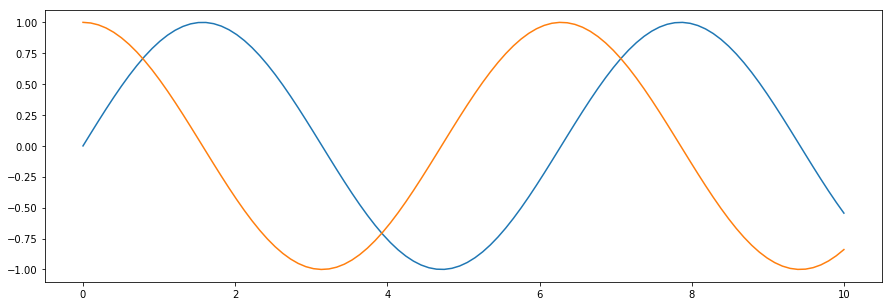

In [64]:
x = np.linspace(0, 10, 100)

fig, ax = plt.subplots(1, figsize=(15, 5))
ax.plot(x, np.sin(x))
ax.plot(x, np.cos(x))
# Besides this object-oriented paradigm, matplotlib also provides MATLAB-based syntax

There are other styles available as well.

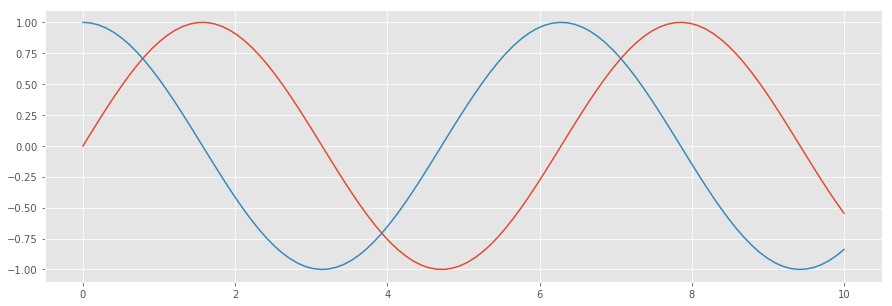

In [65]:
with plt.style.context('ggplot'):
    fig, ax = plt.subplots(1, figsize=(15, 5))
    ax.plot(x, np.sin(x))
    ax.plot(x, np.cos(x))

In [66]:
plt.style.available

['seaborn-white',
 'ggplot',
 'fivethirtyeight',
 'seaborn-deep',
 'bmh',
 'seaborn-colorblind',
 'seaborn-dark-palette',
 'classic',
 'seaborn-whitegrid',
 'seaborn',
 'seaborn-bright',
 'seaborn-notebook',
 'seaborn-dark',
 'seaborn-darkgrid',
 'seaborn-muted',
 'seaborn-ticks',
 'dark_background',
 'seaborn-talk',
 'seaborn-poster',
 'grayscale',
 'seaborn-pastel',
 'seaborn-paper']

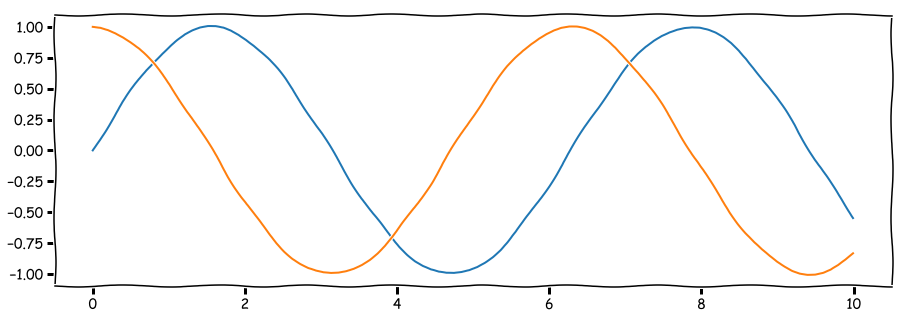

In [67]:
# Even a special one for XKCD!
with plt.xkcd():
    fig, ax = plt.subplots(1, figsize=(15, 5))
    ax.plot(x, np.sin(x))
    ax.plot(x, np.cos(x))

`seaborn` changes the default style after being imported, but it can be reverted back easily setting the default style to `classic`.

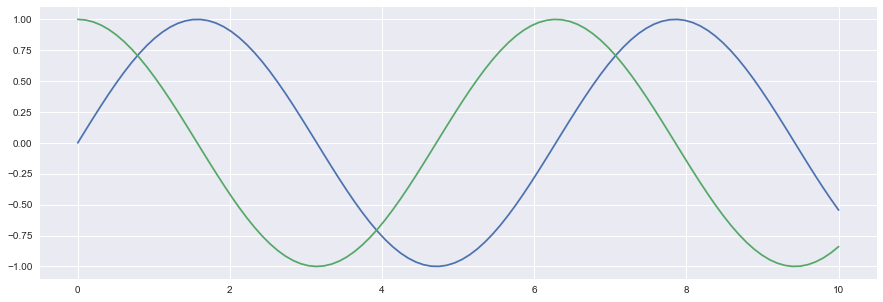

In [68]:
plt.style.use("seaborn")
fig, ax = plt.subplots(1, figsize=(15, 5))
ax.plot(x, np.sin(x))
ax.plot(x, np.cos(x))

Pandas also provides some utilities to create basic plots.

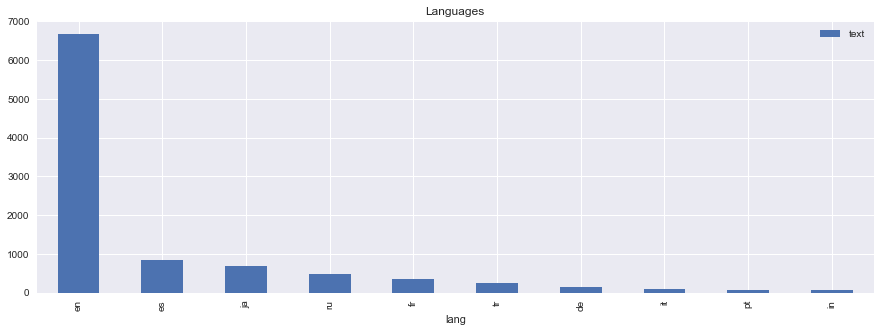

In [69]:
fig, ax = plt.subplots(1, figsize=(15, 5))
count_by(df, "lang").plot(ax=ax,
    kind="bar",
)
ax.set_title("Languages")

Let's create a hitogram with the lengths of tweets.

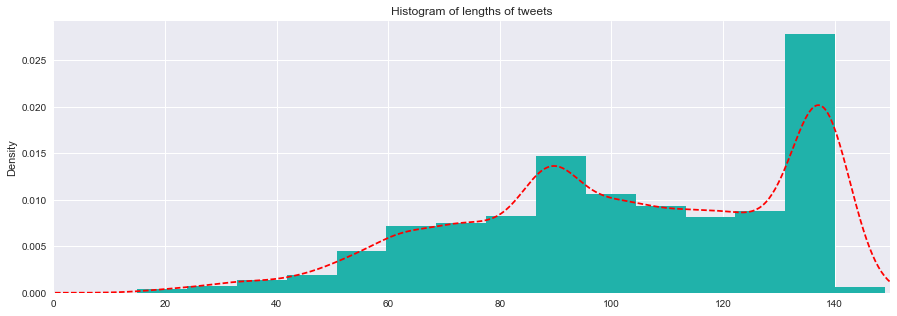

In [70]:
fig, ax = plt.subplots(1, figsize=(15, 5))
df["len"].hist(ax=ax, bins=15, normed=True, color='lightseagreen')
df["len"].plot(ax=ax, kind='kde', xlim=(0, 150), style='r--')
ax.set_title("Histogram of lengths of tweets")

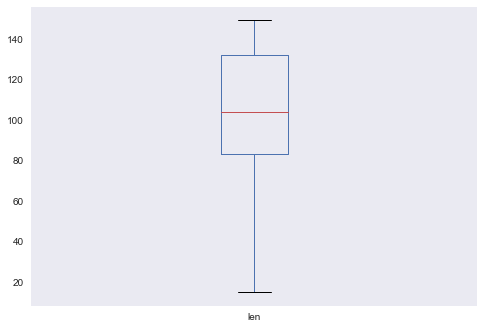

In [71]:
df.boxplot(column="len", grid=False)

Let's now try to find out if there is any sort of relationship between the length of a tweet and the number of hastags it uses.

In [72]:
df["hashtags_count"] = df.hashtags.apply(lambda x: len(x.split(",")))
df[["len", "hashtags_count"]]

,len,hashtags_count
created_at,,
2015-03-09 21:01:01,90,1
2015-03-09 21:08:06,140,1
2015-03-09 21:21:47,126,1
2015-03-09 21:27:31,106,1
2015-03-09 21:01:23,86,1
...,...,...
2015-03-09 21:21:24,133,1
2015-03-09 21:32:28,133,1
2015-03-09 21:27:59,130,1


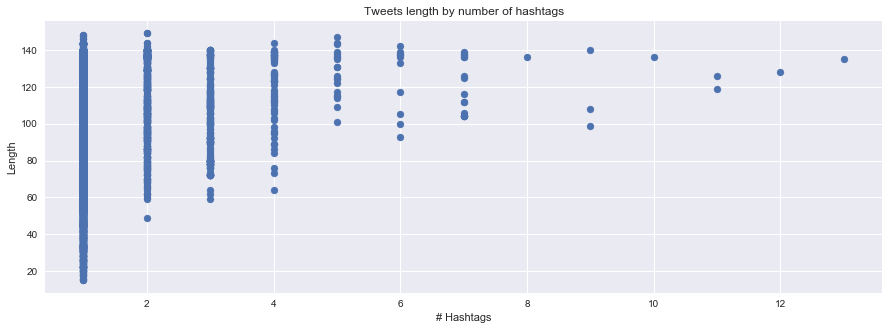

In [73]:
fig, ax = plt.subplots(1, figsize=(15, 5))
ax.scatter(df.hashtags_count, df.len)
ax.set_ylabel("Length")
ax.set_xlabel("# Hashtags")
ax.set_title("Tweets length by number of hashtags")